<a href="https://colab.research.google.com/github/pascalghanimi/Injury-Prediction-in-Runners/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data extraction for LightGBM
import pickle

with open("features.pkl", "rb") as f:
  features = pickle.load(f)

with open("features_days.pkl", "rb") as f:
  features_days = pickle.load(f)

with open("features_weeks.pkl", "rb") as f:
  features_weeks = pickle.load(f)

with open("features_objective.pkl", "rb") as f:
  features_objective = pickle.load(f)

with open("features_subjective.pkl", "rb") as f:
  features_subjective = pickle.load(f)

with open("labels.pkl", "rb") as f:
  labels = pickle.load(f)

print(features[0][0]) # first atlete first row
print(features_days[0][0])
print(features_weeks[0])
print(labels[0])

print(len(features[0][0])) # total amount of features

[ 0.77523982  0.48379555 -0.34174298  1.12482238  4.65573275 -0.30257114
 -0.36195376  1.13221076  0.88408664  0.98946749 -1.07576228 -0.58780279
 -0.34515758 -0.21498604 -0.25818757 -0.30257114 -0.36653747 -1.10832632
 -1.12373205 -1.11938273  0.76147321 -0.58880824 -0.33963599 -0.22015974
 -0.26519341  3.1128211  -0.36131219  0.94306135  0.88408664  0.88198911
 -1.08073515 -0.58890474 -0.33382237 -0.21223522 -0.26471133 -0.29617444
 -0.36131219 -1.10795815 -1.12373205 -1.11942205  0.7667035  -0.5913292
 -0.33382237 -0.22367068 -0.26509659 -0.29617444  2.42402301  0.57403001
  0.88989186  0.9965464   0.78053094  2.39956507  5.70866175 -0.21223522
 -0.26519341  3.3763886  -0.35067995  1.13636789  0.88989186  0.88771258
  0.78584128 -0.58219763 -0.3393889  -0.21762941 -0.25818757 -0.28968273
  2.19131074  0.96442407  0.89572629  0.67074481  0.37283858 -0.47040001
 -0.01179093  0.73505066  1.36358038  0.5749299   0.54093582  1.26319022
  2.68987335 -0.05530893  0.11981333  1.16084473  1.

In [2]:
import numpy as np

X = np.vstack([features[athlete_id] for athlete_id in features])
X_days = np.vstack([features_days[athlete_id] for athlete_id in features_days])
X_weeks = np.vstack([features_weeks[athlete_id] for athlete_id in features_weeks])
X_objective = np.vstack([features_objective[athlete_id] for athlete_id in features_objective])
X_subjective = np.vstack([features_subjective[athlete_id] for athlete_id in features_subjective])

Y = np.hstack([labels[athlete_id] for athlete_id in labels])


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_days, X_temp_days, Y_train_days, Y_temp_days = train_test_split(X_days, Y, test_size=0.3, random_state=42)
X_val_days, X_test_days, Y_val_days, Y_test_days = train_test_split(X_temp_days, Y_temp_days, test_size=0.5, random_state=42)

X_train_weeks, X_temp_weeks, Y_train_weeks, Y_temp_weeks = train_test_split(X_weeks, Y, test_size=0.3, random_state=42)
X_val_weeks, X_test_weeks, Y_val_weeks, Y_test_weeks = train_test_split(X_temp_weeks, Y_temp_weeks, test_size=0.5, random_state=42)

X_train_subjective, X_temp_subjective, Y_train_subjective, Y_temp_subjective = train_test_split(X_subjective, Y, test_size=0.3, random_state=42)
X_val_subjective, X_test_subjective, Y_val_subjective, Y_test_subjective = train_test_split(X_temp_subjective, Y_temp_subjective, test_size=0.5, random_state=42)

X_train_objective, X_temp_objective, Y_train_objective, Y_temp_objective = train_test_split(X_objective, Y, test_size=0.3, random_state=42)
X_val_objective, X_test_objective, Y_val_objective, Y_test_objective = train_test_split(X_temp_objective, Y_temp_objective, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_days.shape, X_val_days.shape, X_test_days.shape)
print(X_train_weeks.shape, X_val_weeks.shape, X_test_weeks.shape)
print(X_train_subjective.shape, X_val_subjective.shape, X_test_subjective.shape)
print(X_train_objective.shape, X_val_objective.shape, X_test_objective.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)


(29876, 139) (6402, 139) (6402, 139)
(29876, 70) (6402, 70) (6402, 70)
(29876, 69) (6402, 69) (6402, 69)
(29876, 48) (6402, 48) (6402, 48)
(29876, 91) (6402, 91) (6402, 91)
(29876,) (6402,) (6402,)


In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.8 MB/s eta 0:00:00


In [5]:
def get_training_batch(X_train, Y_train, batch_size):
    injured_indices = np.where(Y_train == 1)[0]
    uninjured_indices = np.where(Y_train == 0)[0]

    injured_sample = np.random.choice(injured_indices, size=batch_size//2, replace=True)
    uninjured_sample = np.random.choice(uninjured_indices, size=batch_size//2, replace=True)

    selected_indices = np.concatenate([injured_sample, uninjured_sample])
    np.random.shuffle(selected_indices)

    X_batch = X_train[selected_indices]
    Y_batch = Y_train[selected_indices]

    return X_batch, Y_batch

In [6]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

def lightgbm_objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "num_leaves": trial.suggest_int("num_leaves", 7, 255),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 200),
        "reg_alpha": trial.suggest_float("lambda_l1", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("lambda_l2", 0.0, 5.0),
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "verbose": -1
    }

    # Batch Sampling
    X_batch, Y_batch = get_training_batch(X_train, Y_train, 4096)

    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_batch, Y_batch,
        eval_set=[(X_val, Y_val)],
    )

    # Validation AUC
    val_proba = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(Y_val, val_proba)

# Optuna-Studie starten
lgb_study = optuna.create_study(direction="maximize")
lgb_study.optimize(lightgbm_objective, n_trials=100) # 100 trials

print("Best LightGBM-parameters:", lgb_study.best_params)

[I 2025-03-03 15:01:43,705] A new study created in memory with name: no-name-abff8367-b502-4cb0-9e17-936d84e4a14b
[I 2025-03-03 15:01:47,117] Trial 0 finished with value: 0.6913726731002479 and parameters: {'learning_rate': 0.009561387643859671, 'max_depth': 10, 'num_leaves': 118, 'subsample': 0.5381713854302252, 'colsample_bytree': 0.5037263449970508, 'min_child_samples': 56, 'lambda_l1': 1.8082837263893092, 'lambda_l2': 0.7088476565864976, 'boosting_type': 'gbdt'}. Best is trial 0 with value: 0.6913726731002479.
[I 2025-03-03 15:01:50,260] Trial 1 finished with value: 0.6797535551688375 and parameters: {'learning_rate': 0.14873205822961288, 'max_depth': 8, 'num_leaves': 22, 'subsample': 0.7750875093619485, 'colsample_bytree': 0.942418497156865, 'min_child_samples': 37, 'lambda_l1': 2.8108677838525917, 'lambda_l2': 0.14455442127910778, 'boosting_type': 'dart'}. Best is trial 0 with value: 0.6913726731002479.
[I 2025-03-03 15:01:51,508] Trial 2 finished with value: 0.6744059093634582 a

Best LightGBM-parameters: {'learning_rate': 0.13828648158537873, 'max_depth': 6, 'num_leaves': 99, 'subsample': 0.9301768152013156, 'colsample_bytree': 0.7894017683473981, 'min_child_samples': 159, 'lambda_l1': 0.6204750541713304, 'lambda_l2': 2.400983408088044, 'boosting_type': 'gbdt'}


In [7]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import warnings

def train(X_train, Y_train, X_val, Y_val, X_test, Y_test):
  warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

  params = {**lgb_study.best_params}  # Erst in ein normales Dict umwandeln
  params.update({
      "objective": "binary",
      "metric": "auc",
      "verbose": -1
  })


  num_models = 9
  models = []
  batch_size = 4096

  for model_idx in range(num_models):
    X_batch, Y_batch = get_training_batch(X_train, Y_train, batch_size)
    model = lgb.LGBMClassifier(**params)
    model.fit(X_batch, Y_batch, eval_set=[(X_val, Y_val)])
    Y_pred_test = model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(Y_test, Y_pred_test)

    print(f"\nLightGBM Modell {model_idx + 1} Results:")
    print(f"Test-AUC: {test_auc:.4f}")
    models.append(model)

  calibrated_models = [
          CalibratedClassifierCV(m, method='sigmoid', cv="prefit").fit(X_val, Y_val) for m in models
  ]

  def ensemble_predict(models, X):
    test_probas = np.stack([m.predict_proba(X)[:, 1] for m in models])
    return np.mean(test_probas, axis=0)

  Y_probab_test = ensemble_predict(calibrated_models, X_test)
  test_auc = roc_auc_score(Y_test, Y_probab_test)

  print(f"Test-AUC of LightGBM Ensembles: {test_auc:.4f}")

  return calibrated_models, test_auc

In [8]:
# Training with all features (weeks and days combined)
lgbm_models, _ = train(X_train, Y_train, X_val, Y_val, X_test, Y_test)


LightGBM Modell 1 Results:
Test-AUC: 0.6924

LightGBM Modell 2 Results:
Test-AUC: 0.7048

LightGBM Modell 3 Results:
Test-AUC: 0.7022

LightGBM Modell 4 Results:
Test-AUC: 0.6907

LightGBM Modell 5 Results:
Test-AUC: 0.6869

LightGBM Modell 6 Results:
Test-AUC: 0.6660

LightGBM Modell 7 Results:
Test-AUC: 0.6792

LightGBM Modell 8 Results:
Test-AUC: 0.6885

LightGBM Modell 9 Results:
Test-AUC: 0.6762


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7098


In [9]:
# Training with days data
lgbm_models_days, _ = train(X_train_days, Y_train_days, X_val_days, Y_val_days, X_test_days, Y_test_days)


LightGBM Modell 1 Results:
Test-AUC: 0.6808

LightGBM Modell 2 Results:
Test-AUC: 0.6739

LightGBM Modell 3 Results:
Test-AUC: 0.6649

LightGBM Modell 4 Results:
Test-AUC: 0.6941

LightGBM Modell 5 Results:
Test-AUC: 0.6836

LightGBM Modell 6 Results:
Test-AUC: 0.6696

LightGBM Modell 7 Results:
Test-AUC: 0.6792

LightGBM Modell 8 Results:
Test-AUC: 0.6727

LightGBM Modell 9 Results:
Test-AUC: 0.6401


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6946


In [10]:
# Training with weeks data
lgbm_models_weeks, _ = train(X_train_weeks, Y_train_weeks, X_val_weeks, Y_val_weeks, X_test_weeks, Y_test_weeks)


LightGBM Modell 1 Results:
Test-AUC: 0.6796

LightGBM Modell 2 Results:
Test-AUC: 0.6903

LightGBM Modell 3 Results:
Test-AUC: 0.6709

LightGBM Modell 4 Results:
Test-AUC: 0.7103

LightGBM Modell 5 Results:
Test-AUC: 0.6641

LightGBM Modell 6 Results:
Test-AUC: 0.6769

LightGBM Modell 7 Results:
Test-AUC: 0.6530

LightGBM Modell 8 Results:
Test-AUC: 0.6670

LightGBM Modell 9 Results:
Test-AUC: 0.6665


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6957


In [11]:
# Training with objective data
lgbm_models_objective, _ = train(X_train_objective, Y_train_objective, X_val_objective, Y_val_objective, X_test_objective, Y_test_objective)


LightGBM Modell 1 Results:
Test-AUC: 0.6914

LightGBM Modell 2 Results:
Test-AUC: 0.6817

LightGBM Modell 3 Results:
Test-AUC: 0.6961

LightGBM Modell 4 Results:
Test-AUC: 0.6944

LightGBM Modell 5 Results:
Test-AUC: 0.6905

LightGBM Modell 6 Results:
Test-AUC: 0.7077

LightGBM Modell 7 Results:
Test-AUC: 0.6834

LightGBM Modell 8 Results:
Test-AUC: 0.6821

LightGBM Modell 9 Results:
Test-AUC: 0.6985


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7143


In [12]:
# Training with subjective data
lgbm_models_subjective, _ = train(X_train_subjective, Y_train_subjective, X_val_subjective, Y_val_subjective, X_test_subjective, Y_test_subjective)


LightGBM Modell 1 Results:
Test-AUC: 0.6343

LightGBM Modell 2 Results:
Test-AUC: 0.5977

LightGBM Modell 3 Results:
Test-AUC: 0.6249

LightGBM Modell 4 Results:
Test-AUC: 0.6276

LightGBM Modell 5 Results:
Test-AUC: 0.6142

LightGBM Modell 6 Results:
Test-AUC: 0.6443

LightGBM Modell 7 Results:
Test-AUC: 0.6258

LightGBM Modell 8 Results:
Test-AUC: 0.6530

LightGBM Modell 9 Results:
Test-AUC: 0.6177


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6501


In [13]:
amount_of_trainings = 10
all_auc_scores = []
auc_scores_days = []
auc_scores_weeks = []
auc_scores_objective = []
auc_scores_subjective = []

def calculate_average_auc_over_10_rounds(train_fn, auc_scores_array):
  for training in range(amount_of_trainings):
    _, auc = train_fn()
    auc_scores_array.append(auc)
  mean_auc_score = np.mean(auc_scores_array)
  std_auc_score = np.std(auc_scores_array)
  print(f"Mean AUC Score: {mean_auc_score}")
  print(f"Standard Deviation of AUC Scores: {std_auc_score}")

calculate_average_auc_over_10_rounds(lambda: train(X_train, Y_train, X_val, Y_val, X_test, Y_test), all_auc_scores)
calculate_average_auc_over_10_rounds(lambda: train(X_train_days, Y_train_days, X_val_days, Y_val_days, X_test_days, Y_test_days), auc_scores_days)
calculate_average_auc_over_10_rounds(lambda: train(X_train_weeks, Y_train_weeks, X_val_weeks, Y_val_weeks, X_test_weeks, Y_test_weeks), auc_scores_weeks)
calculate_average_auc_over_10_rounds(lambda: train(X_train_objective, Y_train_objective, X_val_objective, Y_val_objective, X_test_objective, Y_test_objective), auc_scores_objective)
calculate_average_auc_over_10_rounds(lambda: train(X_train_subjective, Y_train_subjective, X_val_subjective, Y_val_subjective, X_test_subjective, Y_test_subjective), auc_scores_subjective)


LightGBM Modell 1 Results:
Test-AUC: 0.6968

LightGBM Modell 2 Results:
Test-AUC: 0.6682

LightGBM Modell 3 Results:
Test-AUC: 0.6772

LightGBM Modell 4 Results:
Test-AUC: 0.7059

LightGBM Modell 5 Results:
Test-AUC: 0.6995

LightGBM Modell 6 Results:
Test-AUC: 0.6899

LightGBM Modell 7 Results:
Test-AUC: 0.7059

LightGBM Modell 8 Results:
Test-AUC: 0.6878

LightGBM Modell 9 Results:
Test-AUC: 0.6625


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7073

LightGBM Modell 1 Results:
Test-AUC: 0.6785

LightGBM Modell 2 Results:
Test-AUC: 0.6695

LightGBM Modell 3 Results:
Test-AUC: 0.6904

LightGBM Modell 4 Results:
Test-AUC: 0.6864

LightGBM Modell 5 Results:
Test-AUC: 0.6738

LightGBM Modell 6 Results:
Test-AUC: 0.6697

LightGBM Modell 7 Results:
Test-AUC: 0.6980

LightGBM Modell 8 Results:
Test-AUC: 0.7000

LightGBM Modell 9 Results:
Test-AUC: 0.6902


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7072

LightGBM Modell 1 Results:
Test-AUC: 0.6875

LightGBM Modell 2 Results:
Test-AUC: 0.6738

LightGBM Modell 3 Results:
Test-AUC: 0.6783

LightGBM Modell 4 Results:
Test-AUC: 0.6898

LightGBM Modell 5 Results:
Test-AUC: 0.6796

LightGBM Modell 6 Results:
Test-AUC: 0.6671

LightGBM Modell 7 Results:
Test-AUC: 0.6852

LightGBM Modell 8 Results:
Test-AUC: 0.7038

LightGBM Modell 9 Results:
Test-AUC: 0.6778


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7114

LightGBM Modell 1 Results:
Test-AUC: 0.7040

LightGBM Modell 2 Results:
Test-AUC: 0.7226

LightGBM Modell 3 Results:
Test-AUC: 0.6586

LightGBM Modell 4 Results:
Test-AUC: 0.6773

LightGBM Modell 5 Results:
Test-AUC: 0.6882

LightGBM Modell 6 Results:
Test-AUC: 0.6833

LightGBM Modell 7 Results:
Test-AUC: 0.6909

LightGBM Modell 8 Results:
Test-AUC: 0.6768

LightGBM Modell 9 Results:
Test-AUC: 0.6777


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7104

LightGBM Modell 1 Results:
Test-AUC: 0.6963

LightGBM Modell 2 Results:
Test-AUC: 0.6867

LightGBM Modell 3 Results:
Test-AUC: 0.6894

LightGBM Modell 4 Results:
Test-AUC: 0.6897

LightGBM Modell 5 Results:
Test-AUC: 0.6892

LightGBM Modell 6 Results:
Test-AUC: 0.6966

LightGBM Modell 7 Results:
Test-AUC: 0.6705

LightGBM Modell 8 Results:
Test-AUC: 0.6935

LightGBM Modell 9 Results:
Test-AUC: 0.6888


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7170

LightGBM Modell 1 Results:
Test-AUC: 0.6954

LightGBM Modell 2 Results:
Test-AUC: 0.6885

LightGBM Modell 3 Results:
Test-AUC: 0.6805

LightGBM Modell 4 Results:
Test-AUC: 0.6883

LightGBM Modell 5 Results:
Test-AUC: 0.6894

LightGBM Modell 6 Results:
Test-AUC: 0.6944

LightGBM Modell 7 Results:
Test-AUC: 0.6863

LightGBM Modell 8 Results:
Test-AUC: 0.6954

LightGBM Modell 9 Results:
Test-AUC: 0.6804


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7075

LightGBM Modell 1 Results:
Test-AUC: 0.6680

LightGBM Modell 2 Results:
Test-AUC: 0.7059

LightGBM Modell 3 Results:
Test-AUC: 0.6955

LightGBM Modell 4 Results:
Test-AUC: 0.7068

LightGBM Modell 5 Results:
Test-AUC: 0.6575

LightGBM Modell 6 Results:
Test-AUC: 0.6957

LightGBM Modell 7 Results:
Test-AUC: 0.6904

LightGBM Modell 8 Results:
Test-AUC: 0.6980

LightGBM Modell 9 Results:
Test-AUC: 0.6559


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7105

LightGBM Modell 1 Results:
Test-AUC: 0.6626

LightGBM Modell 2 Results:
Test-AUC: 0.6575

LightGBM Modell 3 Results:
Test-AUC: 0.6724

LightGBM Modell 4 Results:
Test-AUC: 0.7297

LightGBM Modell 5 Results:
Test-AUC: 0.6788

LightGBM Modell 6 Results:
Test-AUC: 0.7053

LightGBM Modell 7 Results:
Test-AUC: 0.6938

LightGBM Modell 8 Results:
Test-AUC: 0.7124

LightGBM Modell 9 Results:
Test-AUC: 0.6990


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7122

LightGBM Modell 1 Results:
Test-AUC: 0.6723

LightGBM Modell 2 Results:
Test-AUC: 0.6709

LightGBM Modell 3 Results:
Test-AUC: 0.6573

LightGBM Modell 4 Results:
Test-AUC: 0.6856

LightGBM Modell 5 Results:
Test-AUC: 0.6642

LightGBM Modell 6 Results:
Test-AUC: 0.6762

LightGBM Modell 7 Results:
Test-AUC: 0.6922

LightGBM Modell 8 Results:
Test-AUC: 0.7002

LightGBM Modell 9 Results:
Test-AUC: 0.6835


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6978

LightGBM Modell 1 Results:
Test-AUC: 0.6806

LightGBM Modell 2 Results:
Test-AUC: 0.6671

LightGBM Modell 3 Results:
Test-AUC: 0.6959

LightGBM Modell 4 Results:
Test-AUC: 0.6910

LightGBM Modell 5 Results:
Test-AUC: 0.7071

LightGBM Modell 6 Results:
Test-AUC: 0.6978

LightGBM Modell 7 Results:
Test-AUC: 0.6975

LightGBM Modell 8 Results:
Test-AUC: 0.6686

LightGBM Modell 9 Results:
Test-AUC: 0.6646


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7093
Mean AUC Score: 0.7090555304492269
Standard Deviation of AUC Scores: 0.004655233148939321

LightGBM Modell 1 Results:
Test-AUC: 0.6778

LightGBM Modell 2 Results:
Test-AUC: 0.7008

LightGBM Modell 3 Results:
Test-AUC: 0.6679

LightGBM Modell 4 Results:
Test-AUC: 0.6626

LightGBM Modell 5 Results:
Test-AUC: 0.6666

LightGBM Modell 6 Results:
Test-AUC: 0.6863

LightGBM Modell 7 Results:
Test-AUC: 0.6793

LightGBM Modell 8 Results:
Test-AUC: 0.6913

LightGBM Modell 9 Results:
Test-AUC: 0.6808


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6958

LightGBM Modell 1 Results:
Test-AUC: 0.6942

LightGBM Modell 2 Results:
Test-AUC: 0.6746

LightGBM Modell 3 Results:
Test-AUC: 0.6573

LightGBM Modell 4 Results:
Test-AUC: 0.6824

LightGBM Modell 5 Results:
Test-AUC: 0.6697

LightGBM Modell 6 Results:
Test-AUC: 0.6867

LightGBM Modell 7 Results:
Test-AUC: 0.6820

LightGBM Modell 8 Results:
Test-AUC: 0.6573

LightGBM Modell 9 Results:
Test-AUC: 0.6533


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6962

LightGBM Modell 1 Results:
Test-AUC: 0.6926

LightGBM Modell 2 Results:
Test-AUC: 0.6685

LightGBM Modell 3 Results:
Test-AUC: 0.6429

LightGBM Modell 4 Results:
Test-AUC: 0.6785

LightGBM Modell 5 Results:
Test-AUC: 0.6841

LightGBM Modell 6 Results:
Test-AUC: 0.6751

LightGBM Modell 7 Results:
Test-AUC: 0.6789

LightGBM Modell 8 Results:
Test-AUC: 0.6659

LightGBM Modell 9 Results:
Test-AUC: 0.6861


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6915

LightGBM Modell 1 Results:
Test-AUC: 0.6779

LightGBM Modell 2 Results:
Test-AUC: 0.6905

LightGBM Modell 3 Results:
Test-AUC: 0.6839

LightGBM Modell 4 Results:
Test-AUC: 0.6915

LightGBM Modell 5 Results:
Test-AUC: 0.6896

LightGBM Modell 6 Results:
Test-AUC: 0.6939

LightGBM Modell 7 Results:
Test-AUC: 0.6834

LightGBM Modell 8 Results:
Test-AUC: 0.6709

LightGBM Modell 9 Results:
Test-AUC: 0.6881


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7096

LightGBM Modell 1 Results:
Test-AUC: 0.6786

LightGBM Modell 2 Results:
Test-AUC: 0.6815

LightGBM Modell 3 Results:
Test-AUC: 0.6658

LightGBM Modell 4 Results:
Test-AUC: 0.6958

LightGBM Modell 5 Results:
Test-AUC: 0.6732

LightGBM Modell 6 Results:
Test-AUC: 0.6827

LightGBM Modell 7 Results:
Test-AUC: 0.6753

LightGBM Modell 8 Results:
Test-AUC: 0.6706

LightGBM Modell 9 Results:
Test-AUC: 0.6616


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6971

LightGBM Modell 1 Results:
Test-AUC: 0.6807

LightGBM Modell 2 Results:
Test-AUC: 0.6771

LightGBM Modell 3 Results:
Test-AUC: 0.6713

LightGBM Modell 4 Results:
Test-AUC: 0.6766

LightGBM Modell 5 Results:
Test-AUC: 0.6754

LightGBM Modell 6 Results:
Test-AUC: 0.6737

LightGBM Modell 7 Results:
Test-AUC: 0.6801

LightGBM Modell 8 Results:
Test-AUC: 0.6582

LightGBM Modell 9 Results:
Test-AUC: 0.6733


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6972

LightGBM Modell 1 Results:
Test-AUC: 0.7027

LightGBM Modell 2 Results:
Test-AUC: 0.6744

LightGBM Modell 3 Results:
Test-AUC: 0.6635

LightGBM Modell 4 Results:
Test-AUC: 0.6638

LightGBM Modell 5 Results:
Test-AUC: 0.6508

LightGBM Modell 6 Results:
Test-AUC: 0.6702

LightGBM Modell 7 Results:
Test-AUC: 0.6592

LightGBM Modell 8 Results:
Test-AUC: 0.6870

LightGBM Modell 9 Results:
Test-AUC: 0.6740


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6969

LightGBM Modell 1 Results:
Test-AUC: 0.6750

LightGBM Modell 2 Results:
Test-AUC: 0.6834

LightGBM Modell 3 Results:
Test-AUC: 0.6744

LightGBM Modell 4 Results:
Test-AUC: 0.6968

LightGBM Modell 5 Results:
Test-AUC: 0.6865

LightGBM Modell 6 Results:
Test-AUC: 0.6824

LightGBM Modell 7 Results:
Test-AUC: 0.7064

LightGBM Modell 8 Results:
Test-AUC: 0.6842

LightGBM Modell 9 Results:
Test-AUC: 0.6647


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7049

LightGBM Modell 1 Results:
Test-AUC: 0.6653

LightGBM Modell 2 Results:
Test-AUC: 0.6733

LightGBM Modell 3 Results:
Test-AUC: 0.6775

LightGBM Modell 4 Results:
Test-AUC: 0.6539

LightGBM Modell 5 Results:
Test-AUC: 0.6673

LightGBM Modell 6 Results:
Test-AUC: 0.6892

LightGBM Modell 7 Results:
Test-AUC: 0.6724

LightGBM Modell 8 Results:
Test-AUC: 0.6739

LightGBM Modell 9 Results:
Test-AUC: 0.6441


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6909

LightGBM Modell 1 Results:
Test-AUC: 0.6831

LightGBM Modell 2 Results:
Test-AUC: 0.6705

LightGBM Modell 3 Results:
Test-AUC: 0.6885

LightGBM Modell 4 Results:
Test-AUC: 0.6779

LightGBM Modell 5 Results:
Test-AUC: 0.6624

LightGBM Modell 6 Results:
Test-AUC: 0.6701

LightGBM Modell 7 Results:
Test-AUC: 0.6601

LightGBM Modell 8 Results:
Test-AUC: 0.6974

LightGBM Modell 9 Results:
Test-AUC: 0.6607


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6949
Mean AUC Score: 0.6975062290837141
Standard Deviation of AUC Scores: 0.005392939289095293

LightGBM Modell 1 Results:
Test-AUC: 0.6838

LightGBM Modell 2 Results:
Test-AUC: 0.6835

LightGBM Modell 3 Results:
Test-AUC: 0.6788

LightGBM Modell 4 Results:
Test-AUC: 0.6739

LightGBM Modell 5 Results:
Test-AUC: 0.6685

LightGBM Modell 6 Results:
Test-AUC: 0.6493

LightGBM Modell 7 Results:
Test-AUC: 0.6980

LightGBM Modell 8 Results:
Test-AUC: 0.6640

LightGBM Modell 9 Results:
Test-AUC: 0.6795


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6931

LightGBM Modell 1 Results:
Test-AUC: 0.6869

LightGBM Modell 2 Results:
Test-AUC: 0.6551

LightGBM Modell 3 Results:
Test-AUC: 0.6729

LightGBM Modell 4 Results:
Test-AUC: 0.6886

LightGBM Modell 5 Results:
Test-AUC: 0.6861

LightGBM Modell 6 Results:
Test-AUC: 0.6814

LightGBM Modell 7 Results:
Test-AUC: 0.6765

LightGBM Modell 8 Results:
Test-AUC: 0.6755

LightGBM Modell 9 Results:
Test-AUC: 0.6508


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6878

LightGBM Modell 1 Results:
Test-AUC: 0.6788

LightGBM Modell 2 Results:
Test-AUC: 0.6893

LightGBM Modell 3 Results:
Test-AUC: 0.6863

LightGBM Modell 4 Results:
Test-AUC: 0.6723

LightGBM Modell 5 Results:
Test-AUC: 0.6759

LightGBM Modell 6 Results:
Test-AUC: 0.6547

LightGBM Modell 7 Results:
Test-AUC: 0.6599

LightGBM Modell 8 Results:
Test-AUC: 0.6608

LightGBM Modell 9 Results:
Test-AUC: 0.6609


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6912

LightGBM Modell 1 Results:
Test-AUC: 0.6694

LightGBM Modell 2 Results:
Test-AUC: 0.6976

LightGBM Modell 3 Results:
Test-AUC: 0.6686

LightGBM Modell 4 Results:
Test-AUC: 0.6705

LightGBM Modell 5 Results:
Test-AUC: 0.6704

LightGBM Modell 6 Results:
Test-AUC: 0.6893

LightGBM Modell 7 Results:
Test-AUC: 0.6665

LightGBM Modell 8 Results:
Test-AUC: 0.6537

LightGBM Modell 9 Results:
Test-AUC: 0.6736


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7017

LightGBM Modell 1 Results:
Test-AUC: 0.6801

LightGBM Modell 2 Results:
Test-AUC: 0.6877

LightGBM Modell 3 Results:
Test-AUC: 0.6707

LightGBM Modell 4 Results:
Test-AUC: 0.6850

LightGBM Modell 5 Results:
Test-AUC: 0.6629

LightGBM Modell 6 Results:
Test-AUC: 0.6695

LightGBM Modell 7 Results:
Test-AUC: 0.6717

LightGBM Modell 8 Results:
Test-AUC: 0.6357

LightGBM Modell 9 Results:
Test-AUC: 0.6870


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6941

LightGBM Modell 1 Results:
Test-AUC: 0.6520

LightGBM Modell 2 Results:
Test-AUC: 0.7039

LightGBM Modell 3 Results:
Test-AUC: 0.6558

LightGBM Modell 4 Results:
Test-AUC: 0.6837

LightGBM Modell 5 Results:
Test-AUC: 0.6859

LightGBM Modell 6 Results:
Test-AUC: 0.6694

LightGBM Modell 7 Results:
Test-AUC: 0.6480

LightGBM Modell 8 Results:
Test-AUC: 0.6898

LightGBM Modell 9 Results:
Test-AUC: 0.6774


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6928

LightGBM Modell 1 Results:
Test-AUC: 0.6648

LightGBM Modell 2 Results:
Test-AUC: 0.6582

LightGBM Modell 3 Results:
Test-AUC: 0.6495

LightGBM Modell 4 Results:
Test-AUC: 0.6826

LightGBM Modell 5 Results:
Test-AUC: 0.6733

LightGBM Modell 6 Results:
Test-AUC: 0.6706

LightGBM Modell 7 Results:
Test-AUC: 0.6544

LightGBM Modell 8 Results:
Test-AUC: 0.6487

LightGBM Modell 9 Results:
Test-AUC: 0.6686


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6818

LightGBM Modell 1 Results:
Test-AUC: 0.6787

LightGBM Modell 2 Results:
Test-AUC: 0.6643

LightGBM Modell 3 Results:
Test-AUC: 0.7092

LightGBM Modell 4 Results:
Test-AUC: 0.6649

LightGBM Modell 5 Results:
Test-AUC: 0.6779

LightGBM Modell 6 Results:
Test-AUC: 0.6813

LightGBM Modell 7 Results:
Test-AUC: 0.6534

LightGBM Modell 8 Results:
Test-AUC: 0.6683

LightGBM Modell 9 Results:
Test-AUC: 0.6876


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6945

LightGBM Modell 1 Results:
Test-AUC: 0.6841

LightGBM Modell 2 Results:
Test-AUC: 0.6823

LightGBM Modell 3 Results:
Test-AUC: 0.6569

LightGBM Modell 4 Results:
Test-AUC: 0.6659

LightGBM Modell 5 Results:
Test-AUC: 0.6511

LightGBM Modell 6 Results:
Test-AUC: 0.6925

LightGBM Modell 7 Results:
Test-AUC: 0.6589

LightGBM Modell 8 Results:
Test-AUC: 0.6876

LightGBM Modell 9 Results:
Test-AUC: 0.6579


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6935

LightGBM Modell 1 Results:
Test-AUC: 0.6697

LightGBM Modell 2 Results:
Test-AUC: 0.6551

LightGBM Modell 3 Results:
Test-AUC: 0.6617

LightGBM Modell 4 Results:
Test-AUC: 0.6547

LightGBM Modell 5 Results:
Test-AUC: 0.6637

LightGBM Modell 6 Results:
Test-AUC: 0.6838

LightGBM Modell 7 Results:
Test-AUC: 0.6272

LightGBM Modell 8 Results:
Test-AUC: 0.6818

LightGBM Modell 9 Results:
Test-AUC: 0.6788


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6788
Mean AUC Score: 0.6909324083347583
Standard Deviation of AUC Scores: 0.006292773222142741

LightGBM Modell 1 Results:
Test-AUC: 0.7212

LightGBM Modell 2 Results:
Test-AUC: 0.6891

LightGBM Modell 3 Results:
Test-AUC: 0.6939

LightGBM Modell 4 Results:
Test-AUC: 0.6821

LightGBM Modell 5 Results:
Test-AUC: 0.7097

LightGBM Modell 6 Results:
Test-AUC: 0.6905

LightGBM Modell 7 Results:
Test-AUC: 0.7014

LightGBM Modell 8 Results:
Test-AUC: 0.6688

LightGBM Modell 9 Results:
Test-AUC: 0.6767


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7155

LightGBM Modell 1 Results:
Test-AUC: 0.6897

LightGBM Modell 2 Results:
Test-AUC: 0.6625

LightGBM Modell 3 Results:
Test-AUC: 0.6921

LightGBM Modell 4 Results:
Test-AUC: 0.6963

LightGBM Modell 5 Results:
Test-AUC: 0.7000

LightGBM Modell 6 Results:
Test-AUC: 0.6635

LightGBM Modell 7 Results:
Test-AUC: 0.6802

LightGBM Modell 8 Results:
Test-AUC: 0.6749

LightGBM Modell 9 Results:
Test-AUC: 0.7005


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7073

LightGBM Modell 1 Results:
Test-AUC: 0.6591

LightGBM Modell 2 Results:
Test-AUC: 0.6808

LightGBM Modell 3 Results:
Test-AUC: 0.6915

LightGBM Modell 4 Results:
Test-AUC: 0.6670

LightGBM Modell 5 Results:
Test-AUC: 0.6966

LightGBM Modell 6 Results:
Test-AUC: 0.6989

LightGBM Modell 7 Results:
Test-AUC: 0.6900

LightGBM Modell 8 Results:
Test-AUC: 0.6804

LightGBM Modell 9 Results:
Test-AUC: 0.6806


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6989

LightGBM Modell 1 Results:
Test-AUC: 0.6774

LightGBM Modell 2 Results:
Test-AUC: 0.6983

LightGBM Modell 3 Results:
Test-AUC: 0.6889

LightGBM Modell 4 Results:
Test-AUC: 0.6779

LightGBM Modell 5 Results:
Test-AUC: 0.6649

LightGBM Modell 6 Results:
Test-AUC: 0.7030

LightGBM Modell 7 Results:
Test-AUC: 0.6891

LightGBM Modell 8 Results:
Test-AUC: 0.6730

LightGBM Modell 9 Results:
Test-AUC: 0.6596


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7021

LightGBM Modell 1 Results:
Test-AUC: 0.7021

LightGBM Modell 2 Results:
Test-AUC: 0.6912

LightGBM Modell 3 Results:
Test-AUC: 0.6919

LightGBM Modell 4 Results:
Test-AUC: 0.6733

LightGBM Modell 5 Results:
Test-AUC: 0.6667

LightGBM Modell 6 Results:
Test-AUC: 0.6911

LightGBM Modell 7 Results:
Test-AUC: 0.6782

LightGBM Modell 8 Results:
Test-AUC: 0.6787

LightGBM Modell 9 Results:
Test-AUC: 0.6827


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7003

LightGBM Modell 1 Results:
Test-AUC: 0.7104

LightGBM Modell 2 Results:
Test-AUC: 0.6666

LightGBM Modell 3 Results:
Test-AUC: 0.6942

LightGBM Modell 4 Results:
Test-AUC: 0.6959

LightGBM Modell 5 Results:
Test-AUC: 0.6826

LightGBM Modell 6 Results:
Test-AUC: 0.6922

LightGBM Modell 7 Results:
Test-AUC: 0.6887

LightGBM Modell 8 Results:
Test-AUC: 0.6827

LightGBM Modell 9 Results:
Test-AUC: 0.6895


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7073

LightGBM Modell 1 Results:
Test-AUC: 0.6791

LightGBM Modell 2 Results:
Test-AUC: 0.6709

LightGBM Modell 3 Results:
Test-AUC: 0.7042

LightGBM Modell 4 Results:
Test-AUC: 0.6944

LightGBM Modell 5 Results:
Test-AUC: 0.6819

LightGBM Modell 6 Results:
Test-AUC: 0.6842

LightGBM Modell 7 Results:
Test-AUC: 0.7005

LightGBM Modell 8 Results:
Test-AUC: 0.6607

LightGBM Modell 9 Results:
Test-AUC: 0.6642


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7012

LightGBM Modell 1 Results:
Test-AUC: 0.7006

LightGBM Modell 2 Results:
Test-AUC: 0.6852

LightGBM Modell 3 Results:
Test-AUC: 0.6780

LightGBM Modell 4 Results:
Test-AUC: 0.6874

LightGBM Modell 5 Results:
Test-AUC: 0.6840

LightGBM Modell 6 Results:
Test-AUC: 0.6768

LightGBM Modell 7 Results:
Test-AUC: 0.6939

LightGBM Modell 8 Results:
Test-AUC: 0.6730

LightGBM Modell 9 Results:
Test-AUC: 0.6873


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7095

LightGBM Modell 1 Results:
Test-AUC: 0.7014

LightGBM Modell 2 Results:
Test-AUC: 0.6832

LightGBM Modell 3 Results:
Test-AUC: 0.6771

LightGBM Modell 4 Results:
Test-AUC: 0.6945

LightGBM Modell 5 Results:
Test-AUC: 0.6684

LightGBM Modell 6 Results:
Test-AUC: 0.6754

LightGBM Modell 7 Results:
Test-AUC: 0.6746

LightGBM Modell 8 Results:
Test-AUC: 0.6790

LightGBM Modell 9 Results:
Test-AUC: 0.6842


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6995

LightGBM Modell 1 Results:
Test-AUC: 0.6912

LightGBM Modell 2 Results:
Test-AUC: 0.6818

LightGBM Modell 3 Results:
Test-AUC: 0.6884

LightGBM Modell 4 Results:
Test-AUC: 0.6691

LightGBM Modell 5 Results:
Test-AUC: 0.6920

LightGBM Modell 6 Results:
Test-AUC: 0.6729

LightGBM Modell 7 Results:
Test-AUC: 0.6658

LightGBM Modell 8 Results:
Test-AUC: 0.6765

LightGBM Modell 9 Results:
Test-AUC: 0.6770


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.7009
Mean AUC Score: 0.704262494809097
Standard Deviation of AUC Scores: 0.005153978323167739

LightGBM Modell 1 Results:
Test-AUC: 0.6383

LightGBM Modell 2 Results:
Test-AUC: 0.6344

LightGBM Modell 3 Results:
Test-AUC: 0.6248

LightGBM Modell 4 Results:
Test-AUC: 0.6259

LightGBM Modell 5 Results:
Test-AUC: 0.6367

LightGBM Modell 6 Results:
Test-AUC: 0.6512

LightGBM Modell 7 Results:
Test-AUC: 0.6419

LightGBM Modell 8 Results:
Test-AUC: 0.6269

LightGBM Modell 9 Results:
Test-AUC: 0.6437


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6648

LightGBM Modell 1 Results:
Test-AUC: 0.6276

LightGBM Modell 2 Results:
Test-AUC: 0.6231

LightGBM Modell 3 Results:
Test-AUC: 0.6039

LightGBM Modell 4 Results:
Test-AUC: 0.6288

LightGBM Modell 5 Results:
Test-AUC: 0.6261

LightGBM Modell 6 Results:
Test-AUC: 0.6422

LightGBM Modell 7 Results:
Test-AUC: 0.6271

LightGBM Modell 8 Results:
Test-AUC: 0.6108

LightGBM Modell 9 Results:
Test-AUC: 0.5957


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6439

LightGBM Modell 1 Results:
Test-AUC: 0.6602

LightGBM Modell 2 Results:
Test-AUC: 0.6728

LightGBM Modell 3 Results:
Test-AUC: 0.6265

LightGBM Modell 4 Results:
Test-AUC: 0.6119

LightGBM Modell 5 Results:
Test-AUC: 0.6520

LightGBM Modell 6 Results:
Test-AUC: 0.6036

LightGBM Modell 7 Results:
Test-AUC: 0.6376

LightGBM Modell 8 Results:
Test-AUC: 0.6034

LightGBM Modell 9 Results:
Test-AUC: 0.6295


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6585

LightGBM Modell 1 Results:
Test-AUC: 0.6324

LightGBM Modell 2 Results:
Test-AUC: 0.6459

LightGBM Modell 3 Results:
Test-AUC: 0.6259

LightGBM Modell 4 Results:
Test-AUC: 0.6276

LightGBM Modell 5 Results:
Test-AUC: 0.6231

LightGBM Modell 6 Results:
Test-AUC: 0.6546

LightGBM Modell 7 Results:
Test-AUC: 0.6480

LightGBM Modell 8 Results:
Test-AUC: 0.6438

LightGBM Modell 9 Results:
Test-AUC: 0.6269


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6615

LightGBM Modell 1 Results:
Test-AUC: 0.6301

LightGBM Modell 2 Results:
Test-AUC: 0.6141

LightGBM Modell 3 Results:
Test-AUC: 0.6120

LightGBM Modell 4 Results:
Test-AUC: 0.6365

LightGBM Modell 5 Results:
Test-AUC: 0.6135

LightGBM Modell 6 Results:
Test-AUC: 0.6684

LightGBM Modell 7 Results:
Test-AUC: 0.6181

LightGBM Modell 8 Results:
Test-AUC: 0.6421

LightGBM Modell 9 Results:
Test-AUC: 0.6319


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6581

LightGBM Modell 1 Results:
Test-AUC: 0.6134

LightGBM Modell 2 Results:
Test-AUC: 0.6422

LightGBM Modell 3 Results:
Test-AUC: 0.6140

LightGBM Modell 4 Results:
Test-AUC: 0.6349

LightGBM Modell 5 Results:
Test-AUC: 0.6231

LightGBM Modell 6 Results:
Test-AUC: 0.6341

LightGBM Modell 7 Results:
Test-AUC: 0.6318

LightGBM Modell 8 Results:
Test-AUC: 0.6281

LightGBM Modell 9 Results:
Test-AUC: 0.6449


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6541

LightGBM Modell 1 Results:
Test-AUC: 0.6485

LightGBM Modell 2 Results:
Test-AUC: 0.6268

LightGBM Modell 3 Results:
Test-AUC: 0.6290

LightGBM Modell 4 Results:
Test-AUC: 0.6387

LightGBM Modell 5 Results:
Test-AUC: 0.6312

LightGBM Modell 6 Results:
Test-AUC: 0.6321

LightGBM Modell 7 Results:
Test-AUC: 0.6134

LightGBM Modell 8 Results:
Test-AUC: 0.6474

LightGBM Modell 9 Results:
Test-AUC: 0.6297


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6553

LightGBM Modell 1 Results:
Test-AUC: 0.6590

LightGBM Modell 2 Results:
Test-AUC: 0.6353

LightGBM Modell 3 Results:
Test-AUC: 0.6028

LightGBM Modell 4 Results:
Test-AUC: 0.6393

LightGBM Modell 5 Results:
Test-AUC: 0.6120

LightGBM Modell 6 Results:
Test-AUC: 0.6242

LightGBM Modell 7 Results:
Test-AUC: 0.6268

LightGBM Modell 8 Results:
Test-AUC: 0.6115

LightGBM Modell 9 Results:
Test-AUC: 0.6216


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6489

LightGBM Modell 1 Results:
Test-AUC: 0.6541

LightGBM Modell 2 Results:
Test-AUC: 0.6454

LightGBM Modell 3 Results:
Test-AUC: 0.6194

LightGBM Modell 4 Results:
Test-AUC: 0.6353

LightGBM Modell 5 Results:
Test-AUC: 0.6393

LightGBM Modell 6 Results:
Test-AUC: 0.6368

LightGBM Modell 7 Results:
Test-AUC: 0.6050

LightGBM Modell 8 Results:
Test-AUC: 0.6486

LightGBM Modell 9 Results:
Test-AUC: 0.6323


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6604

LightGBM Modell 1 Results:
Test-AUC: 0.6293

LightGBM Modell 2 Results:
Test-AUC: 0.6037

LightGBM Modell 3 Results:
Test-AUC: 0.6109

LightGBM Modell 4 Results:
Test-AUC: 0.6421

LightGBM Modell 5 Results:
Test-AUC: 0.6472

LightGBM Modell 6 Results:
Test-AUC: 0.6104

LightGBM Modell 7 Results:
Test-AUC: 0.6557

LightGBM Modell 8 Results:
Test-AUC: 0.6287

LightGBM Modell 9 Results:
Test-AUC: 0.6200


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
/usr/local/lib/python3.1

Test-AUC of LightGBM Ensembles: 0.6562
Mean AUC Score: 0.6561530522510199
Standard Deviation of AUC Scores: 0.005811711464012648


<ipython-input-14-e42cfe3f54cd>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


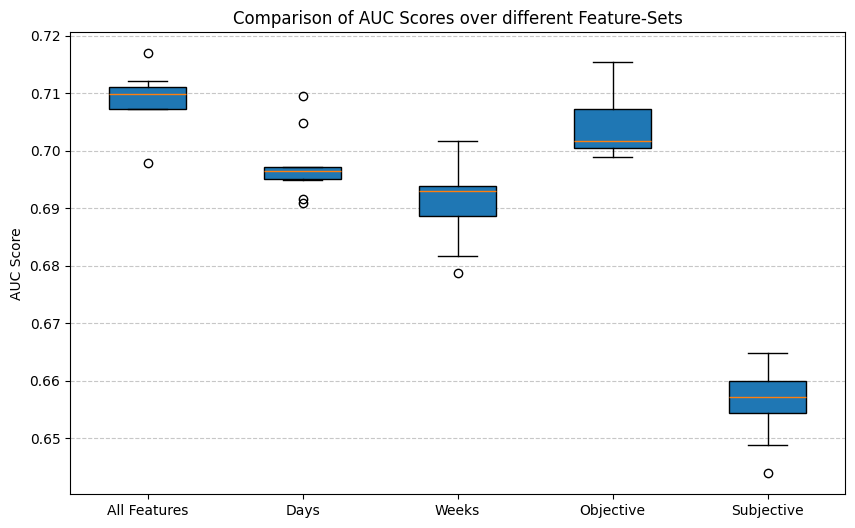

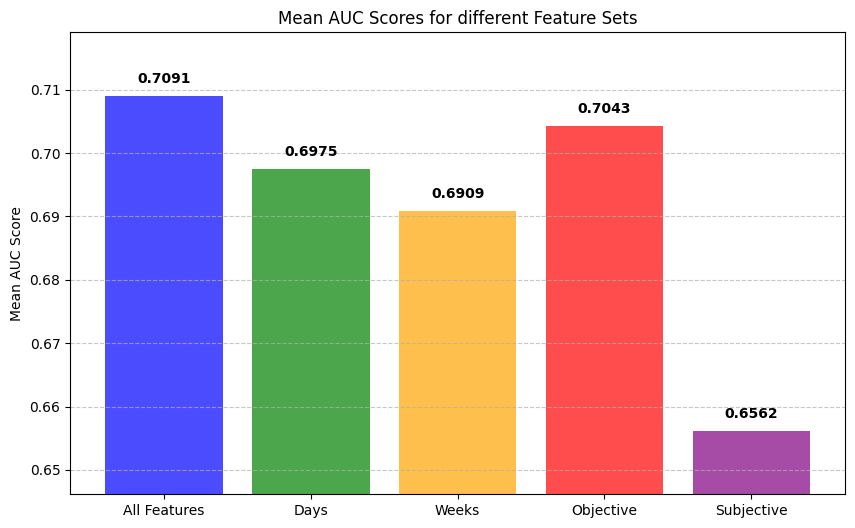

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(
    [all_auc_scores, auc_scores_days, auc_scores_weeks, auc_scores_objective, auc_scores_subjective],
    labels=["All Features", "Days", "Weeks", "Objective", "Subjective"],
    patch_artist=True
)
plt.ylabel("AUC Score")
plt.title("Comparison of AUC Scores over different Feature-Sets")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Mean
mean_auc_scores = {
    "All Features": np.mean(all_auc_scores),
    "Days": np.mean(auc_scores_days),
    "Weeks": np.mean(auc_scores_weeks),
    "Objective": np.mean(auc_scores_objective),
    "Subjective": np.mean(auc_scores_subjective),
}

# Diagrams
plt.figure(figsize=(10, 6))
plt.bar(mean_auc_scores.keys(), mean_auc_scores.values(), color=["blue", "green", "orange", "red", "purple"], alpha=0.7)
plt.ylabel("Mean AUC Score")
plt.title("Mean AUC Scores for different Feature Sets")
plt.ylim(min(mean_auc_scores.values()) - 0.01, max(mean_auc_scores.values()) + 0.01)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, v in enumerate(mean_auc_scores.values()):
    plt.text(i, v + 0.002, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

plt.show()

In [15]:
# Single model export (only all features since it has the best probabilities overall)
import joblib
joblib.dump(lgbm_models, 'lgbm_models.pkl')

['lgbm_models.pkl']

In [16]:
# Model export for Ensemble prediction later
import joblib

joblib.dump(lgbm_models, 'lgbm_models.pkl')
joblib.dump(lgbm_models_days, 'lgbm_models_days.pkl')
joblib.dump(lgbm_models_weeks, 'lgbm_models_weeks.pkl')
joblib.dump(lgbm_models_objective, 'lgbm_models_objective.pkl')
joblib.dump(lgbm_models_subjective, 'lgbm_models_subjective.pkl')

['lgbm_models_subjective.pkl']